# Libraries


In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Variables

**Duty cycle**

In [133]:
timeSleepSecond = 53%50 +5
timeSleepSecondMicro = timeSleepSecond*10e+5
print(timeSleepSecondMicro, "microseconds")

8000000.0 microseconds


**Battery**

In [134]:
JBattery= 6953%5000+15000
print(JBattery, "Joule")

16953 Joule


# Dataset Analysis

**Structure of the dataset**

In [135]:
dataset = pd.read_csv("deep_sleep.csv")
print(dataset.head(3))

                    Timestamp   Data
0  2024-03-03 20:14:47.705952  59.89
1  2024-03-03 20:14:47.756244  59.50
2  2024-03-03 20:14:47.805842  59.82


**Description of the dataset**

In [136]:
print(dataset.describe())

             Data
count  726.000000
mean   196.190455
std    229.660507
min     58.640000
25%     59.530000
50%     59.860000
75%    308.632500
max    778.710000


From this graph it's possible to distinguish when the ESP32 is in a particular state.

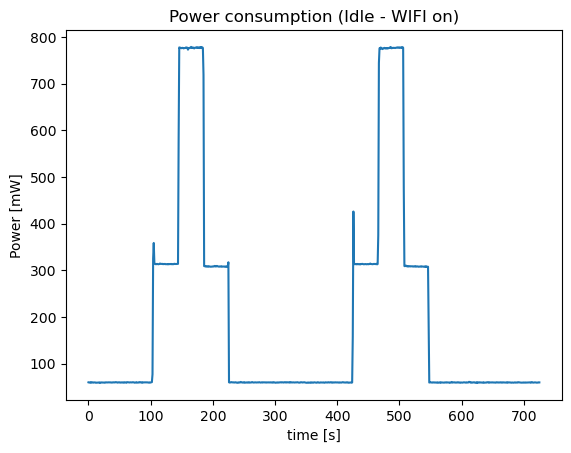

In [137]:
dataset.plot(xlabel="time [s]",                                       
            ylabel="Power [mW]",                                      
            title="Power consumption (Idle - WIFI on)",  
            kind="line",                                              
            legend=False);

# Average Power Consumption

Computing the average power consuption during each functional state requires filtering the datapoints according to empirical observation of the plotted data.

| deep sleep | idle              | WiFi on  |
|------------|-------------------|----------|
| < 100 mW   | >300 mW, < 500 mW | > 600 mW | 

Computing the average power consuption during the **deep sleep** state, it's filtered all the datapoints below the 100W

In [138]:
records = dataset["Data"]

averagePowerDS = records[records< 100].mean().round(3)
averagePowerIS = records[records> 300][records< 500].mean().round(3)
averagePowerTX2_1 = records[records> 600].mean().round(3)

print("Deep Sleep: ",averagePowerDS, "mW")
print("Idle: ", averagePowerIS, "mW")
print("Transmitting at 2 dBm: ", averagePowerTX2_1, "mW")



Deep Sleep:  59.661 mW
Idle:  313.398 mW
Transmitting at 2 dBm:  775.489 mW


# Data transmission

**Structure of the dataset**

In [139]:
dataset = pd.read_csv("transmission_power.csv")
print(dataset.head(3))

                    Timestamp    Data
0  2024-03-03 19:04:29.955113  704.75
1  2024-03-03 19:04:30.005088  703.82
2  2024-03-03 19:04:30.054739  704.65


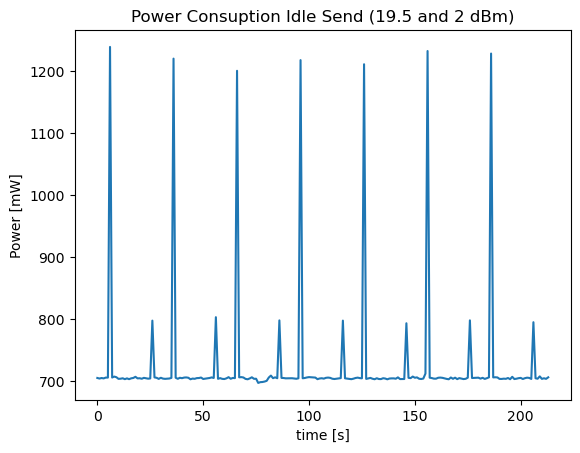

In [140]:
dataset.plot(xlabel="time [s]",                                   
            ylabel="Power [mW]",                                  
            title="Power Consuption Idle Send (19.5 and 2 dBm)",  
            kind="line",                                          
            legend=False);

Calculating power consumption when **sending signals** with **2 dBm power**  

In [141]:
records = dataset["Data"]
averagePowerWF = records[records< 720].mean().round(3)
print("Sending signals at 2dBm: ", averagePowerWF, "mW")

Sending signals at 2dBm:  704.215 mW


Calculating power consumption in 

In [142]:
records = dataset["Data"]
averagePowerTX2 = records[records> 750][records< 850].mean().round(3)
print("Sending signals at 2dBm: ", averagePowerTX2, "mW")

Sending signals at 2dBm:  797.294 mW


Board consumption when **transmitting** at 19.5 dBm power

In [143]:
records = dataset["Data"]
averagePowerTX19 = records[records> 1200].mean().round(3)
print("Sending signals at 19.5dBm: ", averagePowerTX19, "mW")

Sending signals at 19.5dBm:  1221.76 mW


# Sensor reading

In [144]:
dataset = pd.read_csv("sensor_read.csv")
print(dataset.head(3))

                    Timestamp    Data
0  2024-03-03 20:24:46.935040  467.11
1  2024-03-03 20:24:46.984494  466.25
2  2024-03-03 20:24:47.034875  466.68


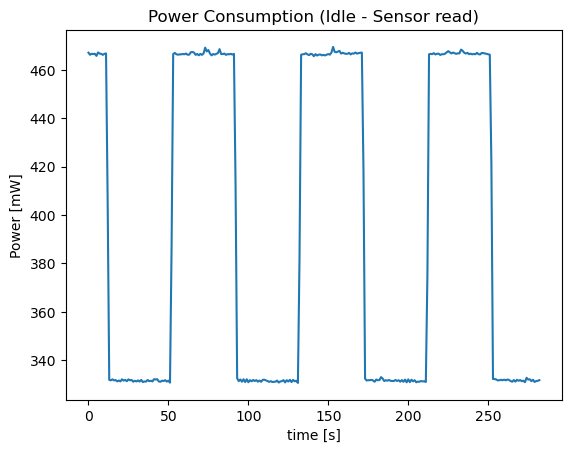

In [145]:
dataset.plot(xlabel="time [s]", 
            ylabel="Power [mW]", 
            title="Power Consumption (Idle - Sensor read)", 
            kind="line", 
            legend=False);

Sensor unused: **Idle**

In [146]:
records = dataset["Data"]
averagePowerIS2 = records[records< 340].mean().round(3)
print("Idle: ", averagePowerIS2, "mW")

Idle:  331.586 mW


Sensor **reading**

In [147]:
records = dataset["Data"]
averagePowerSR = records[records> 460].mean().round(3)
print("Sensor reading: ", averagePowerSR, "mW")

Sensor reading:  466.745 mW


# Outcome

Final results of all the powering average

In [148]:
print("deep sleep: ", averagePowerDS, "mW")
print("idle [1]: ", averagePowerIS, "mW")
print("idle [2]: ", averagePowerIS2, "mW")
print("WiFi ON: ", averagePowerWF, "mW")
print("transmission [2 dBm]: ", averagePowerTX2, "mW")
print("transmission [19.5 dBm]: ", averagePowerTX19, "mW")
print("sensor reading: ", averagePowerSR, "mW")

deep sleep:  59.661 mW
idle [1]:  313.398 mW
idle [2]:  331.586 mW
WiFi ON:  704.215 mW
transmission [2 dBm]:  797.294 mW
transmission [19.5 dBm]:  1221.76 mW
sensor reading:  466.745 mW


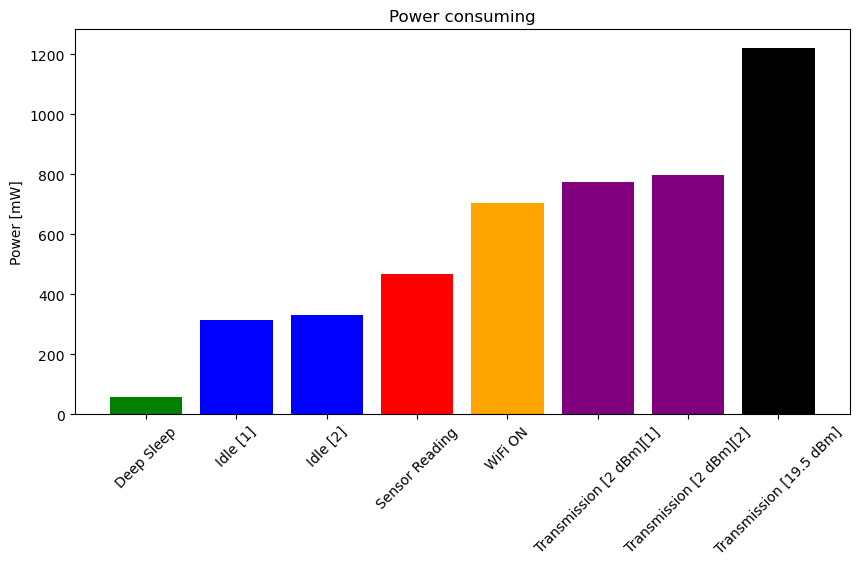

In [153]:
states = ["Deep Sleep", "Idle [1]", "Idle [2]", "WiFi ON", "Transmission [2 dBm][1]", "Transmission [2 dBm][2]", "Transmission [19.5 dBm]", "Sensor Reading" ]

power_values = [
    averagePowerDS, averagePowerIS, averagePowerIS2, averagePowerWF,
    averagePowerTX2_1, averagePowerTX2, averagePowerTX19, averagePowerSR
]

sorted_data = sorted(zip(power_values, states))
sorted_power_values, sorted_states = zip(*sorted_data)

plt.figure(figsize=(10, 5))
plt.bar(sorted_states, sorted_power_values, color=['green', 'blue', 'blue', 'red', 'orange', 'purple','purple', 'black'])

plt.ylabel("Power [mW]")
plt.title("Power consuming")
plt.xticks(rotation=45)

plt.show()


In our case we don't consume Transmission power at 19.5 dBm, due the fact that we use the component only at 2dBm

# Time estimation

find out the dataset

# Energy consumption

We can see the average energy consuption for each state

In [150]:
print("Energy consuption on the **deep sleep** state ",averagePowerDS*timeSL ," nJ")
print("Energy consuption on the **idle** state ",averagePowerIS*timeSL ," nJ")
print("Energy consuption on the **transmission** state ",averagePowerTS*timeSL ," nJ")
print("Energy consuption on the **idle** state at 2 dBm ",averagePowerIS2*timeSL ," nJ")
print("Energy consuption on the **transmission** state at 19.5 dBm ",averagePowerTS2*timeSL ," nJ")
print("Energy consuption on the **idle** state at sensor reading ",averagePowerIS3*timeSL ," nJ")
print("Energy consuption on the **transmission** state at sensor reading ",averagePowerSR*timeSL ," nJ")


NameError: name 'timeSL' is not defined